# Isolation Forest

https://www.geeksforgeeks.org/anomaly-detection-using-isolation-forest/

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# initialize and fit the model
clf = IsolationForest(contamination=0.1)
clf.fit(X_train)

IsolationForest(contamination=0.1)

In [4]:
# predict the anomalies in the data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[ 1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1]
[ 1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1]


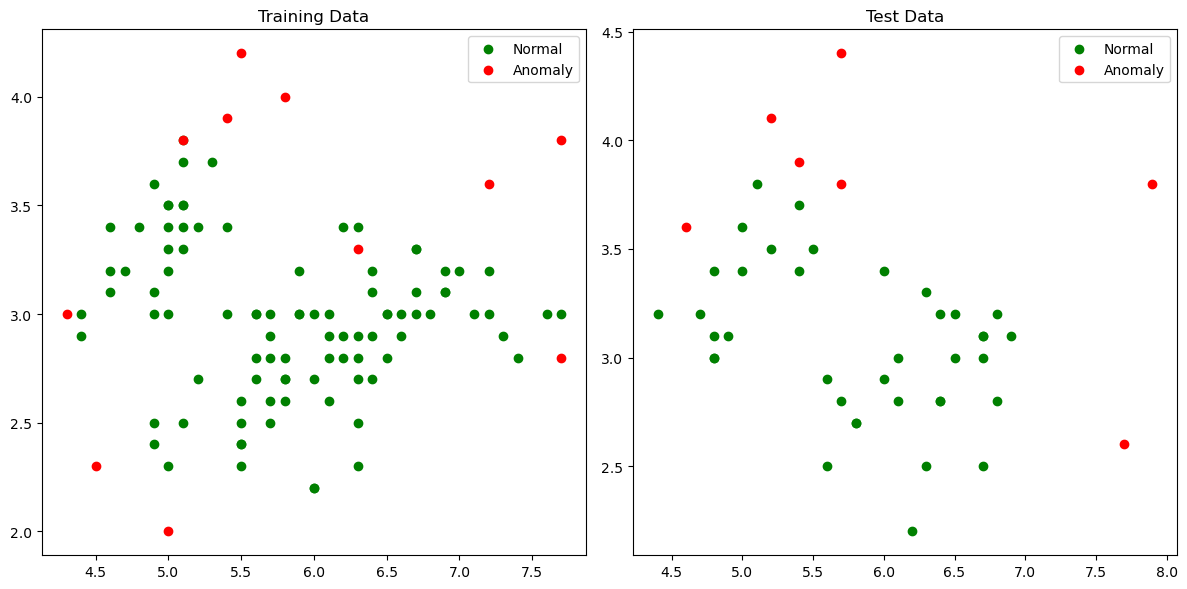

In [5]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')


# Helper

In [6]:
help(IsolationForest)

Help on class IsolationForest in module sklearn.ensemble._iforest:

class IsolationForest(sklearn.base.OutlierMixin, sklearn.ensemble._bagging.BaseBagging)
 |  IsolationForest(*, n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)
 |  
 |  Isolation Forest Algorithm.
 |  
 |  Return the anomaly score of each sample using the IsolationForest algorithm
 |  
 |  The IsolationForest 'isolates' observations by randomly selecting a feature
 |  and then randomly selecting a split value between the maximum and minimum
 |  values of the selected feature.
 |  
 |  Since recursive partitioning can be represented by a tree structure, the
 |  number of splittings required to isolate a sample is equivalent to the path
 |  length from the root node to the terminating node.
 |  
 |  This path length, averaged over a forest of such random trees, is a
 |  measure of normality and our decision function